<a href="https://colab.research.google.com/github/ChacoGolden/DSML_EV/blob/main/Graph_start_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [13]:
car_df = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/CH_vehicles_ev_percentage.csv')
pm10 = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/PM10_emissions_CH.csv')
no2 = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/No2_emissions_CH.csv')
co2 = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/DSML_EV/refs/heads/main/CO2_carb_comb.csv')

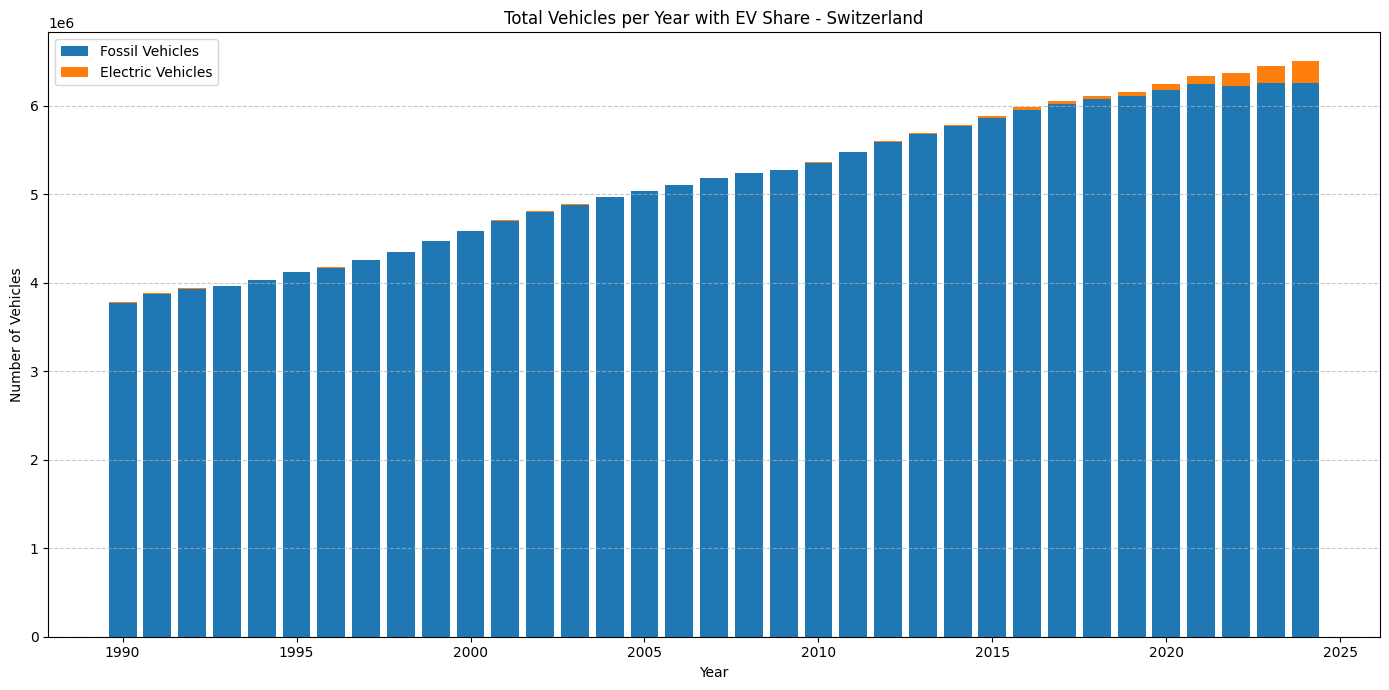

In [8]:
import matplotlib.pyplot as plt

# Assuming df_transposed is already prepared as before
# Make sure data is float or int
df_transposed = df_transposed.astype(float)

# Create the plot
plt.figure(figsize=(14, 7))

# Plot stacked bars
plt.bar(df_transposed.index, df_transposed['Fossil'], label='Fossil Vehicles')
plt.bar(df_transposed.index, df_transposed['Electricity'], bottom=df_transposed['Fossil'], label='Electric Vehicles')

# Add labels and legend
plt.title('Total Vehicles per Year with EV Share - Switzerland')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


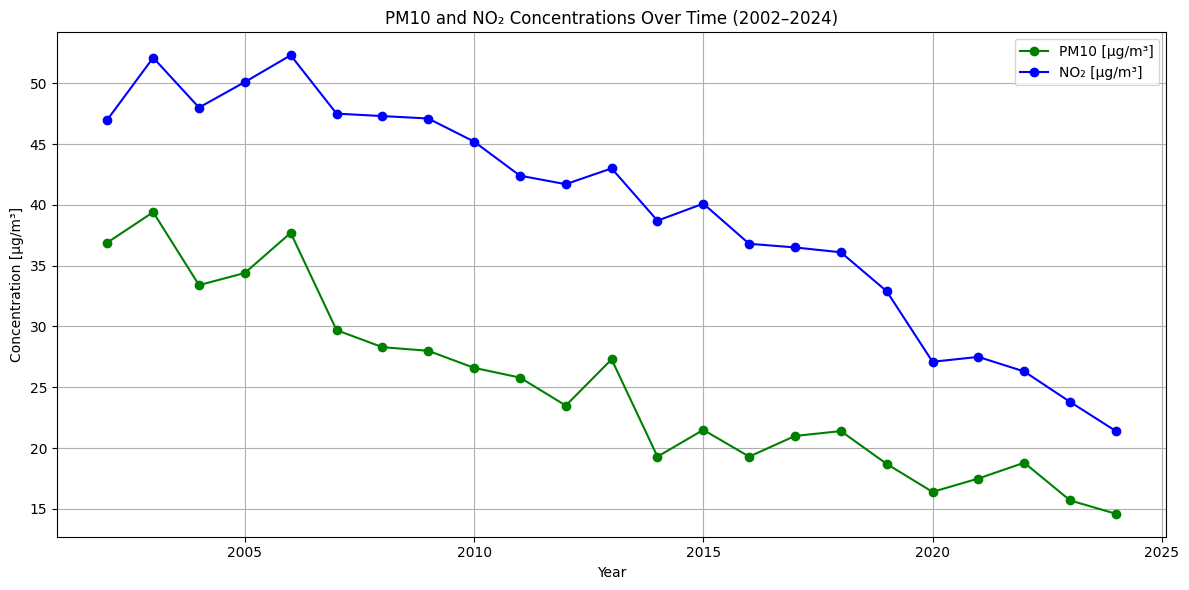

In [12]:
import matplotlib.pyplot as plt

# Ensure 'date' columns are integers
pm10['date'] = pm10['date'].astype(int)
no2['date'] = no2['date'].astype(int)

# Filter both datasets for 2002–2024
pm10_filtered = pm10[(pm10['date'] >= 2002) & (pm10['date'] <= 2024)]
no2_filtered = no2[(no2['date'] >= 2002) & (no2['date'] <= 2024)]

# Merge data on 'date' to align years
merged = pd.merge(pm10_filtered, no2_filtered, on='date', how='outer').sort_values('date')

# Plot both lines
plt.figure(figsize=(12, 6))
plt.plot(merged['date'], merged['PM10 [ug/m3]'], marker='o', label='PM10 [µg/m³]', color='green')
plt.plot(merged['date'], merged['NO2 [ug/m3]'], marker='o', label='NO₂ [µg/m³]', color='blue')

# Labels and grid
plt.title('PM10 and NO₂ Concentrations Over Time (2002–2024)')
plt.xlabel('Year')
plt.ylabel('Concentration [µg/m³]')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [14]:
# Convert year to integer
co2['Année'] = co2['Année'].astype(int)

# Keep only 'Année' and 'Emissions totale', rename columns for consistency
co2_clean = co2[['Année', 'Emissions totale']].copy()
co2_clean.columns = ['date', 'CO2_total']

# Filter to match the NO2/PM10 date range
co2_filtered = co2_clean[(co2_clean['date'] >= 2002) & (co2_clean['date'] <= 2024)]


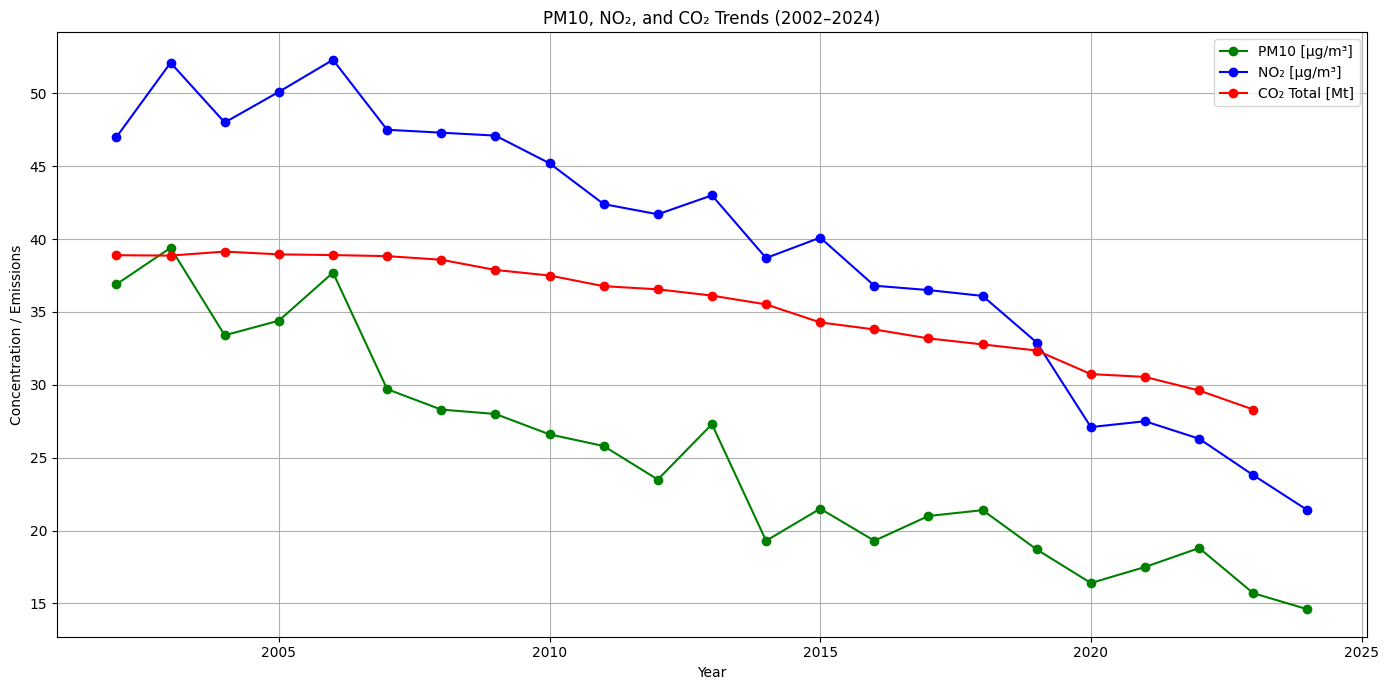

In [15]:
# Merge all three datasets
all_data = pd.merge(merged, co2_filtered, on='date', how='outer').sort_values('date')

# Plot
plt.figure(figsize=(14, 7))
plt.plot(all_data['date'], all_data['PM10 [ug/m3]'], label='PM10 [µg/m³]', marker='o', color='green')
plt.plot(all_data['date'], all_data['NO2 [ug/m3]'], label='NO₂ [µg/m³]', marker='o', color='blue')
plt.plot(all_data['date'], all_data['CO2_total'], label='CO₂ Total [Mt]', marker='o', color='red')

# Styling
plt.title('PM10, NO₂, and CO₂ Trends (2002–2024)')
plt.xlabel('Year')
plt.ylabel('Concentration / Emissions')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


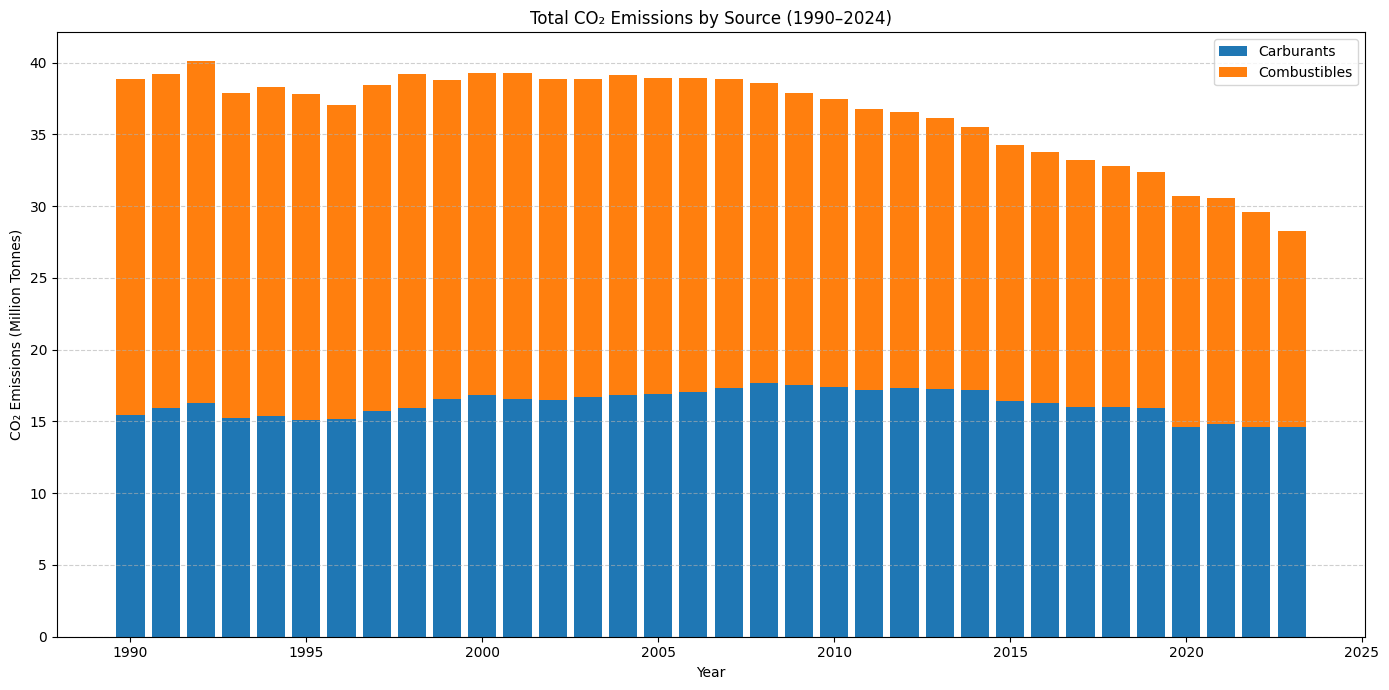

In [16]:
import matplotlib.pyplot as plt

# Step 1: Clean and convert relevant columns
co2['Année'] = co2['Année'].astype(int)
co2['carburant'] = co2["Emissions liées aux carburants, en millions de tonnes de CO2"].astype(float)
co2['combustible'] = co2["Emissions liées aux combustibles, en millions de tonnes de CO2"].astype(float)

# Step 2: Filter years if needed (e.g., from 1990 to 2024)
co2_filtered = co2[(co2['Année'] >= 1990) & (co2['Année'] <= 2024)]

# Step 3: Plot stacked bar chart
plt.figure(figsize=(14, 7))
plt.bar(co2_filtered['Année'], co2_filtered['carburant'], label='Carburants')
plt.bar(co2_filtered['Année'], co2_filtered['combustible'],
        bottom=co2_filtered['carburant'], label='Combustibles')

# Styling
plt.title('Total CO₂ Emissions by Source (1990–2024)')
plt.xlabel('Year')
plt.ylabel('CO₂ Emissions (Million Tonnes)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
